In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

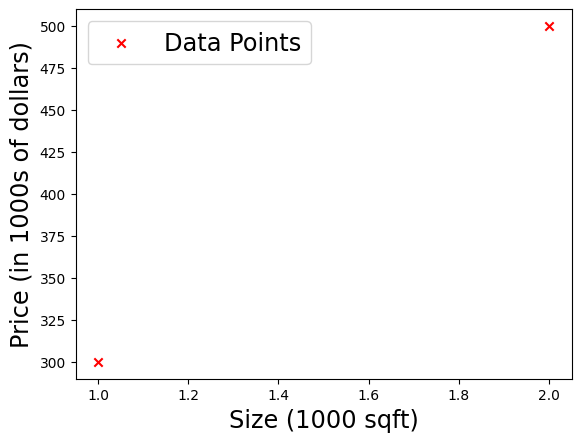

In [3]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [4]:
linear_layer = tf.keras.layers.Dense(units = 1, activation= 'linear',)

In [5]:
linear_layer.get_weights()

[]

In [7]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.17150104]], shape=(1, 1), dtype=float32)


<h3> It applies a linear transformation:
𝑦 = 𝑊⋅𝑥 + 𝑏
where:
x is the input ([[1.0]]).
W (weights) and 
b (bias) are learned parameters of the linear layer. </h3>

In [9]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[0.17150104]], b=[0.]


In [10]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [11]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [15]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    """
    Plots the linear model with training data and predictions.

    Parameters:
    X_train (array-like): The training data input features.
    Y_train (array-like): The actual values (true labels).
    prediction_tf (array-like): The predictions from the TensorFlow model.
    prediction_np (array-like): The predictions from the NumPy model.
    """
    
    plt.figure(figsize=(10, 6))
    
    # Plot the training data points
    plt.scatter(X_train, Y_train, color='blue', label='Training Data', alpha=0.6)
    
    # Plot the predictions from the TensorFlow model
    plt.plot(X_train, prediction_tf, color='red', label='TensorFlow Predictions', linewidth=2)
    
    # Plot the predictions from the NumPy model
    plt.plot(X_train, prediction_np, color='green', label='NumPy Predictions', linestyle='--', linewidth=2)
    
    # Adding labels and title
    plt.title('Linear Model: Training Data vs Predictions', fontsize=16)
    plt.xlabel('X (Input Features)', fontsize=12)
    plt.ylabel('Y (Target Variable)', fontsize=12)
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

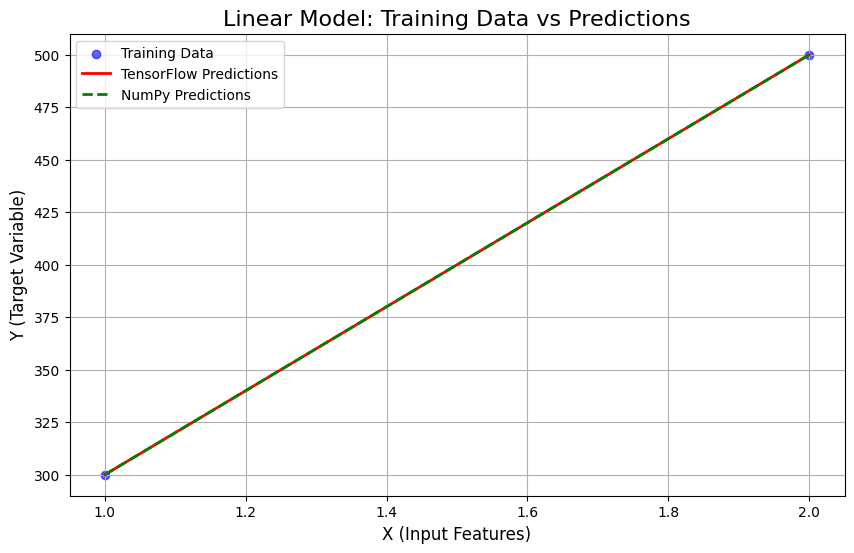

In [16]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b
plt_linear(X_train, Y_train, prediction_tf, prediction_np)